# Lab: Build Neural Networks via Pytorch

The purpose of this assignment is to learn how to build neural networks using PyTorch, focusing on both the theoretical and practical aspects of the process.

One key step involves passing the output of a regression model through the Sigmoid function. This operation transforms the raw output (often called the logit) into a probability value between 0 and 1, which represents the likelihood of an observation belonging to the positive class. 

This step is particularly important in binary classification tasks, as it allows us to interpret the model's predictions in probabilistic terms and enables subsequent evaluation using metrics such as accuracy or binary cross-entropy loss.

## Imports
<hr>

In [7]:
!pip install pandas
!pip install matplotlib
!pip install torch
!pip install torchsummary
!pip install scikit-learn

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torchsummary import summary
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_regression, make_circles, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

## Neural Network Classification
<hr>

### 1. Binary Classification

We will build a binary classification model using PyTorch. The output of the regression model will be passed through the Sigmoid function to convert it into a value between 0 and 1, representing the probability that an observation belongs to the positive class.

#### PyTorch Tensor

Please convert your input data, X (features) and y (labels), into PyTorch tensors so they can be used with PyTorch models.

X_t and y_t are created as tensors with the data type torch.float32, which is required for most machine learning tasks in PyTorch.

In [13]:
X, y = make_circles(n_samples=300, factor=0.5, noise=0.1, random_state=2020)

# Your code for tensor
X_t = torch.tensor(X, dtype=torch.float32)#your code
y_t = torch.tensor(y, dtype=torch.float32)#your code

#### TensorDataset
Use PyTorch's TensorDataset and DataLoader to prepare the dataset for training, including batching and shuffling.

Requirements:

Combine X_t and y_t into a dataset using TensorDataset.

Use DataLoader to create batches of data for training. The batch size should be specified by the variable 45.
Enable shuffle=True in the DataLoader to randomize the order of data for each epoch.

In [15]:
# Create dataloader
# Your code for TensorDataset and dataloader
batchSize = 45


train_dataset = TensorDataset(X_t, y_t)

dataloader = DataLoader(train_dataset, batch_size=batchSize, shuffle=True)


#### Visualize your circular dataset

Visualize your circular dataset with the following requirements:

- The figure size should be set to 5×5.
- Data points with y = 0 should be marked in blue, and those with y = 1 should be marked in red.
- Both the x-axis and y-axis labels should have a font size of 14.

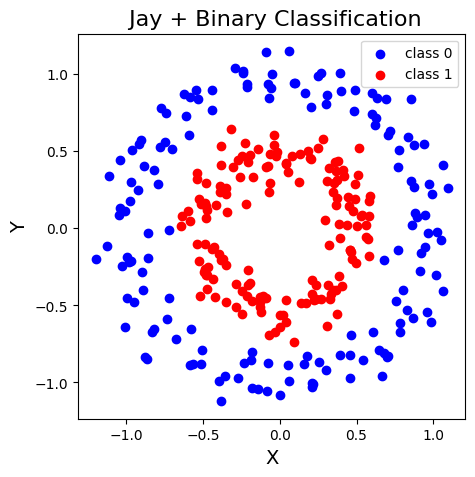

In [43]:

# Plot each class
# Your code plot with scatter
plt.figure(figsize=(5,5))
# Add Label and title
plt.title(" Jay + Binary Classification", fontsize=16)
# Your code set graph axises

x_0_1 = []
x_0_0 = []

x_1_1 = []
x_1_0 = []
for i, j, k in zip(X[:, 0], X[:, 1], y):
    if k == 0:
        x_0_0.append(i)
        x_1_0.append(j)
    else:
        x_0_1.append(i)
        x_1_1.append(j)


plt.scatter(x_0_0, x_1_0, color='blue', label='class 0')
plt.scatter(x_0_1, x_1_1, color='red', label='class 1')


plt.xlabel("X", fontsize=14)
plt.ylabel("Y", fontsize=14)
plt.legend()

plt.show()

In [45]:
# Plot each class
# Example results



We're going to start using `ReLU` as our activation function(s) and `Adam` as our optimizer because these are what are currently, commonly used in practice. We are doing classification now so we'll need to use log loss (binary cross entropy) as our loss function:

$$f(w) = \sum_{x,y \in D} -y log(\hat{y}) - (1-y)log(1-\hat{y})$$

#### Create Neural Network 

Implement a neural network class for binary classification using PyTorch's nn.Module.

- Create a fully connected layer that maps the input features to the hidden layer.
- Use Relu as activation
- Create another fully connected layer
- Use Sigmoid


In [49]:

class binaryClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.main = nn.Sequential(
            # Your code 
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        out = self.main(x)
        return out

#### Build trainer

Implement a simple training wrapper for a PyTorch network that handles the forward pass, backpropagation, and parameter updates for multiple epochs.

Training Process:

Epoch Loop: 
- Iterate over the specified number of epochs.

Batch Loop:
- Iterate over batches of X and y from the dataloader.
- Clear the gradients using optimizer.zero_grad().
- Perform a forward pass:
- Use the model to compute predictions (y_hat).
- Flatten the output to match the expected shape if necessary.
- Calculate the loss using criterion(y_hat, y).
- Perform backpropagation with loss to compute gradients.
- Update model parameters using optimizer.step().
- Accumulate the loss for the batch into a running total.

Logging:
- At the end of each epoch, compute and print the average loss over all batches if verbose is True.

In [52]:
def trainer(model, criterion, optimizer, dataloader, epochs=5, verbose=True):
    # You may review the ipynb file from Week 6
    loss_arr = []
    # Your code
    for epoch in range(epochs):
        losses = 0
        for X, y in dataloader:
            if y.dim() > 1:
                y = y.flatten()
            
            optimizer.zero_grad() # you code        # Clear gradients w.r.t. parameters
            y_hat = model(X).flatten() # you code       # Forward pass to get output
            loss = criterion(y_hat, y) # you code        # Calculate loss
            loss.backward() # you code         # Getting gradients w.r.t. parameters
            optimizer.step() # you code            # Update parameters
            losses += loss.item() # you code       # Add loss for this batch to running total
        loss_arr.append(losses / len(dataloader))
        if verbose: print(f"epoch: {epoch + 1}, loss: {losses / len(dataloader):.4f}")
    return loss_arr

In PyTorch, the binary cross entropy loss criterion is `torch.nn.BCELoss`. The formula expects a "probability" which is why we add a Sigmoid function to the end of out network.

In [56]:
LEARNING_RATE = 0.1
criterion = nn.BCELoss() #your code  # loss function - binary cross entropy loss
optimizer = torch.optim.Adam(model.parameters(), lr = LEARNING_RATE) #your code  # optimization algorithm - Adam

NameError: name 'model' is not defined

Let's train the model:

In [58]:
# Your code
# set your mode with 2 input layers, 6 hidden layers, and 1 output layers via binaryClassifier class
model = binaryClassifier(2, 6, 1) # your code 

#### Activation functions

We're going to using `ReLU` as our activation function(s) and `Adam` as our optimizer because these are what are currently, commonly used in practice. We are doing classification now so we'll need to use log loss (binary cross entropy) as our loss function:

$$f(w) = \sum_{x,y \in D} -y log(\hat{y}) - (1-y)log(1-\hat{y})$$

In PyTorch, the binary cross entropy loss criterion is `torch.nn.BCELoss`. The formula expects a "probability" which is why we add a Sigmoid function to the end of out network.

In [61]:
LEARNING_RATE = 0.1
criterion = torch.nn.BCELoss() # loss function
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)  # optimization algorithm

In [62]:
# build your trainer funtion with model, criterion, optimizer, dataloader, epochs=30, verbose=True
# Your code

losses = trainer(model, criterion, optimizer, dataloader, epochs=30, verbose=True)


epoch: 1, loss: 0.6510
epoch: 2, loss: 0.5536
epoch: 3, loss: 0.4296
epoch: 4, loss: 0.3094
epoch: 5, loss: 0.2171
epoch: 6, loss: 0.1569
epoch: 7, loss: 0.1255
epoch: 8, loss: 0.0979
epoch: 9, loss: 0.0840
epoch: 10, loss: 0.0777
epoch: 11, loss: 0.0698
epoch: 12, loss: 0.0659
epoch: 13, loss: 0.0533
epoch: 14, loss: 0.0523
epoch: 15, loss: 0.0538
epoch: 16, loss: 0.0465
epoch: 17, loss: 0.0473
epoch: 18, loss: 0.0423
epoch: 19, loss: 0.0386
epoch: 20, loss: 0.0348
epoch: 21, loss: 0.0359
epoch: 22, loss: 0.0318
epoch: 23, loss: 0.0306
epoch: 24, loss: 0.0300
epoch: 25, loss: 0.0290
epoch: 26, loss: 0.0284
epoch: 27, loss: 0.0255
epoch: 28, loss: 0.0290
epoch: 29, loss: 0.0248
epoch: 30, loss: 0.0213


#### Visualize your results 

#### Part 1: Loss Curve

- Please plot the loss curve during training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

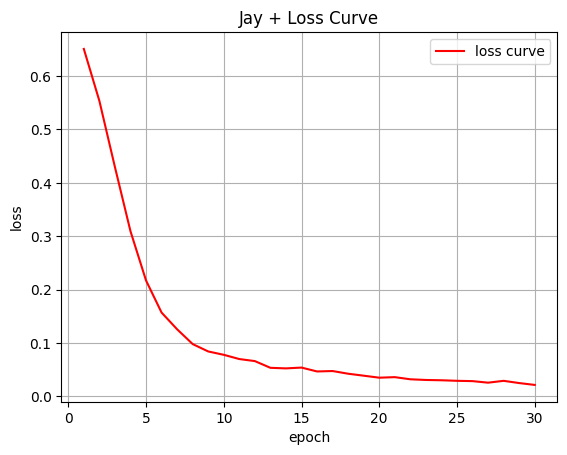

In [70]:
# Your code 

epochs = np.array(np.arange(1, 31))

plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Jay + Loss Curve")
plt.plot(epochs, losses, color='red', label="loss curve")
plt.grid()
plt.legend()
plt.show()


### Part 2: Actual and predicted data 

- Please plot the Actual and predicted data after training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

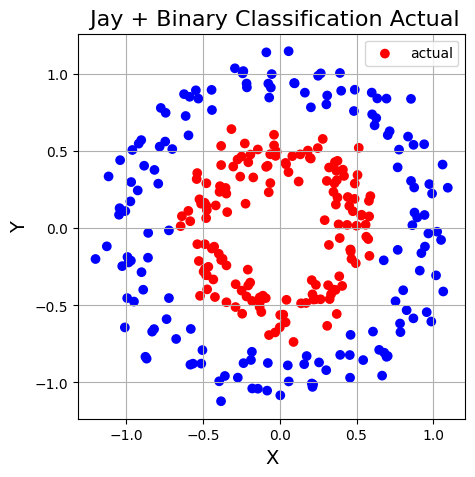

In [73]:
# Your code

plt.figure(figsize=(5,5))
plt.title(" Jay + Binary Classification Actual", fontsize=16)

# y_t = actual
colors_actual = ['blue' if n == 0 else 'red' for n in y_t]

plt.xlabel("X" ,fontsize=14)
plt.ylabel("Y", fontsize=14)
plt.scatter(X_t[:, 0], X_t[:, 1], c=colors_actual, label='actual')
plt.grid()
plt.legend()

plt.show()

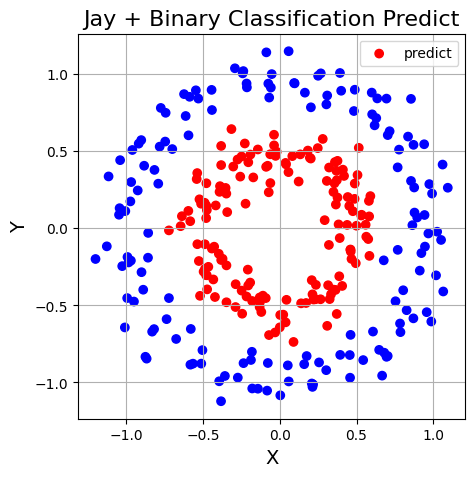

In [75]:
# predict
y_p = model(X_t).flatten() # getting prediction with proper shape
y_b = (y_p >= 0.5).float() # converting into binary labels
y_bn = y_b.detach().numpy() # converting into numpy array

plt.figure(figsize=(5,5))
plt.title("Jay + Binary Classification Predict", fontsize=16)

colors_predict = ['blue' if n == 0 else 'red' for n in y_bn]

plt.xlabel("X", fontsize=14)
plt.ylabel("Y", fontsize=14)
plt.scatter(X_t[:, 0], X_t[:, 1], c=colors_predict, label='predict')
plt.grid()
plt.legend()
plt.show()


To be clear, our model is just outputting some number between -1 and +1 (we are applying Sigmoid in the model), so:
- To get the probabilities we would need to pass them through a Sigmoid;
- To get classes, we can apply some threshold (usually 0.5) to this probability.

For example, we would expect the point (0,0) to have a high probability and the point (-1,-1) to have a low probability:

In [86]:
def sigmoid(x):
    return 1/(1+np.exp(x))

prediction = model(X_t)

print(prediction)

tensor([[9.4835e-01],
        [9.9812e-01],
        [9.9723e-01],
        [9.9812e-01],
        [5.2287e-07],
        [9.8010e-01],
        [2.9739e-03],
        [9.9180e-01],
        [9.9706e-01],
        [9.9811e-01],
        [7.3961e-06],
        [9.9476e-01],
        [9.9812e-01],
        [1.2472e-03],
        [1.5063e-03],
        [1.1249e-03],
        [7.1822e-03],
        [9.9470e-01],
        [2.3025e-03],
        [3.4376e-05],
        [7.9756e-01],
        [9.8714e-01],
        [5.0365e-05],
        [9.9463e-01],
        [9.6920e-01],
        [9.8015e-01],
        [9.9295e-01],
        [9.9812e-01],
        [9.9812e-01],
        [6.6961e-06],
        [9.8665e-01],
        [4.6412e-03],
        [9.9743e-01],
        [1.6131e-05],
        [9.0377e-01],
        [9.9668e-01],
        [5.3244e-04],
        [6.6526e-05],
        [1.0368e-03],
        [9.9812e-01],
        [9.9773e-01],
        [9.9812e-01],
        [1.3902e-03],
        [9.7744e-01],
        [1.7393e-05],
        [4

In [90]:

probability = torch.sigmoid(y_p).detach().numpy()# you code
print(probability)

[0.7207829  0.73068887 0.7305145  0.73068887 0.5000001  0.72712773
 0.5007435  0.7294428  0.73047924 0.73068774 0.50000185 0.7300273
 0.73068887 0.5003118  0.5003766  0.5002812  0.50179553 0.73001474
 0.5005756  0.5000086  0.6894516  0.7285222  0.5000126  0.73000187
 0.7249599  0.72713715 0.7296708  0.73068887 0.73068887 0.50000167
 0.72842526 0.5011603  0.7305528  0.50000405 0.7117245  0.73040515
 0.5001331  0.5000166  0.5002592  0.73068887 0.730613   0.73068887
 0.50034755 0.72660047 0.50000435 0.501122   0.5000003  0.73068887
 0.5000091  0.5004627  0.5000059  0.50055975 0.50073344 0.73068887
 0.5161733  0.73020196 0.5259227  0.7290843  0.73068887 0.50000226
 0.71165913 0.73068887 0.73068887 0.50068337 0.71937    0.7265448
 0.7087863  0.72345    0.54280216 0.50000006 0.7291118  0.5001153
 0.5000151  0.73068887 0.50047934 0.5000775  0.7293416  0.7092503
 0.5009387  0.5000017  0.50000036 0.50045395 0.73068887 0.73068887
 0.73068887 0.73068887 0.73068887 0.50000024 0.50021577 0.73068887

In [92]:
classes = np.where(probability > 0.5, 1, 0)
print(classes)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


### 2. Multiclass Classification

For multiclass classification, we'll need the softmax function:

$$\sigma(\vec{z})_i=\frac{e^{z_i}}{\sum_{j=1}^{K}e^{z_j}}$$

It basically outputs probabilities for each class we wish to predict, and they all sum to 1. 

`torch.nn.CrossEntropyLoss` is a loss that combines a softmax with cross entropy loss. 

Let's try a 4-class classification problem using the following network:


In [96]:
X, y = make_blobs(n_samples=200, centers=4, center_box=(-1.2, 1.2), cluster_std=[0.15, 0.15, 0.15, 0.15], random_state=12345)
X_t = torch.tensor(X, dtype=torch.float32) #your code
y_t = torch.tensor(y, dtype=torch.float32) #your code

# Create dataloader
dataset = TensorDataset(X_t, y_t) #your code
dataloader = DataLoader(dataset, batch_size=45, shuffle=True) #your code

In [98]:
class multiClassifier(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.main = torch.nn.Sequential(
            torch.nn.Linear(input_size, hidden_size),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_size, output_size)
            
        )

    def forward(self, x):
        out = self.main(x)
        return out

#### Visualize your circular dataset

Visualize your circular dataset with the following requirements:

- The figure size should be set to 5×5.
- Both the x-axis and y-axis labels should have a font size of 14.

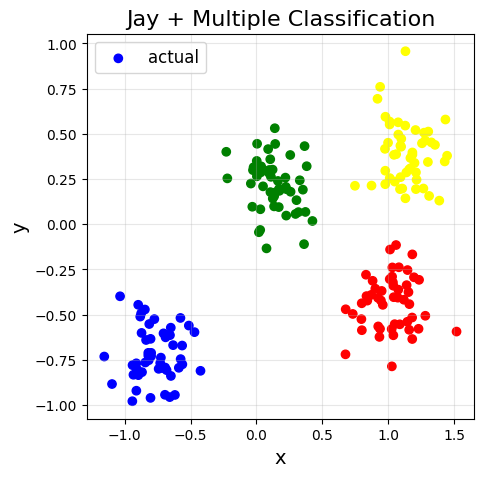

In [101]:
# Plot each class
# Your code plot with scatter

plt.figure(figsize=(5,5))

# Add Label and title
plt.title("Jay + Multiple Classification", fontsize=16)
# Your code 

colors = []
for i in y_t:
    if i == 0:
        colors.append('red')
    elif i == 1:
        colors.append('blue')
    elif i == 2:
        colors.append('green')
    else:
        colors.append('yellow')

plt.scatter(X_t[:, 0], X_t[:, 1], color=colors, label='actual')

plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

Let's train this model:

In [111]:
# model with 2 input layers, 6 hidden layers, and 4 output layers via multiClassifier class
# Your code 
model_2 = multiClassifier(2, 6, 4) #your code

# Your code 
criterion = torch.nn.CrossEntropyLoss() # loss function with CrossEntropyLoss
optimizer = torch.optim.Adam(model_2.parameters(),lr=0.2) # optimization algorithm - Adam lr=0.2

accuracies = []
correct = 0
total = 0


for epoch in range(35):
    losses = 0
    for X_batch, y_batch in dataloader: 
        optimizer.zero_grad() #your code       # Clear gradients w.r.t. parameters
        y_hat = model(X_batch) #your code           # Forward pass to get output
        loss = criterion(y_hat.flatten(), y_batch)#your code  # Calculate loss
        loss.backward() #your code             # Getting gradients w.r.t. parameters
        optimizer.step() #your code            # Update parameters
        losses += loss #your code        # Add loss for this batch to running total

        predicted = torch.argmax(y_hat, dim=1)
        correct += (predicted == y_batch).sum().item()
        
        total += y_batch.size(0)
        
    accuracy = correct / total
    accuracies.append(accuracy)
    
    print(f"epoch: {epoch + 1}, loss: {losses / len(dataloader):.4f}")


epoch: 1, loss: 224.5393
epoch: 2, loss: 224.9198
epoch: 3, loss: 224.7351
epoch: 4, loss: 226.1544
epoch: 5, loss: 225.6728
epoch: 6, loss: 225.2939
epoch: 7, loss: 224.6745
epoch: 8, loss: 223.4646
epoch: 9, loss: 225.0033
epoch: 10, loss: 224.9128
epoch: 11, loss: 225.2724
epoch: 12, loss: 225.9311
epoch: 13, loss: 224.2728
epoch: 14, loss: 224.5434
epoch: 15, loss: 223.8920
epoch: 16, loss: 224.8031
epoch: 17, loss: 224.2898
epoch: 18, loss: 223.7456
epoch: 19, loss: 225.0351
epoch: 20, loss: 224.1851
epoch: 21, loss: 224.3863
epoch: 22, loss: 224.9128
epoch: 23, loss: 224.9982
epoch: 24, loss: 225.8916
epoch: 25, loss: 224.6342
epoch: 26, loss: 224.6049
epoch: 27, loss: 225.5030
epoch: 28, loss: 224.4284
epoch: 29, loss: 225.0570
epoch: 30, loss: 224.6590
epoch: 31, loss: 223.7783
epoch: 32, loss: 224.9348
epoch: 33, loss: 225.1373
epoch: 34, loss: 225.7316
epoch: 35, loss: 224.6495


#### Visualize your results 

### Part 3: Accuracy Curve for 4 classes

- Please plot the Accuracy Curve during training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

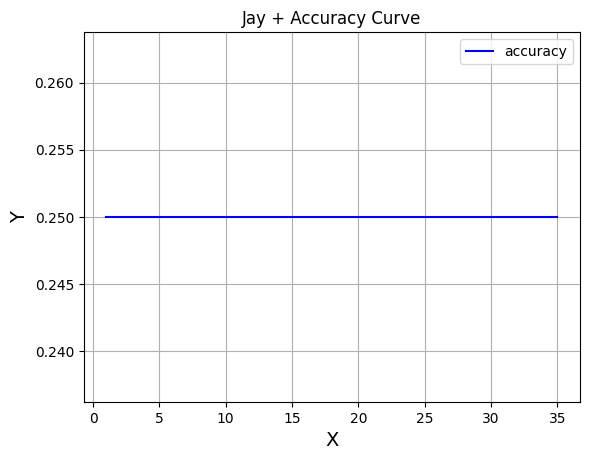

In [116]:
# Your code
epoch = np.arange(1, 36)

plt.title("Jay + Accuracy Curve")
plt.xlabel("X", fontsize=14)
plt.ylabel("Y", fontsize=14)
plt.plot(epoch, accuracies, color='blue', label='accuracy')
plt.grid()
plt.legend()
plt.show()



### Part 4: Actual and predicted data for classes

- Please plot the Actual and predicted data after training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

In [119]:
# Your code

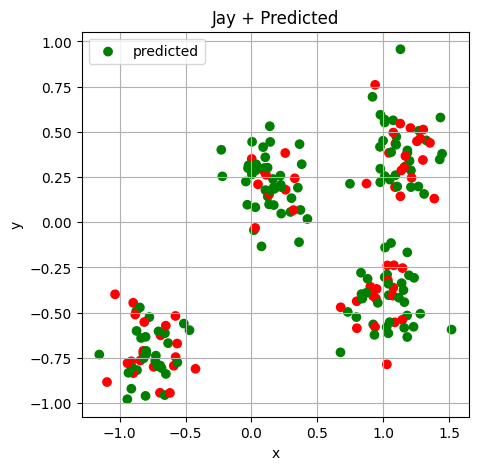

In [135]:
#predicted:
y_pred = []
with torch.no_grad():
    for X_batch, _ in dataloader:
        y_hat = model_2(X_batch)
        predicted = torch.argmax(y_hat, dim=1)
        y_pred.extend(predicted.detach().numpy())

colors_p = []
for i, j in zip(y_pred, y_t):
    if i == 0:
        colors_p.append('red')
    elif i == 1:
        colors.append('blue')
    elif i == 2:
        colors_p.append('green')
    else:
        colors_p.append('yellow')

plt.figure(figsize=(5,5))
plt.scatter(X_t[:, 0], X_t[:, 1], color=colors_p, label="predicted")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Jay + Predicted")
plt.grid()
plt.legend()
plt.show()




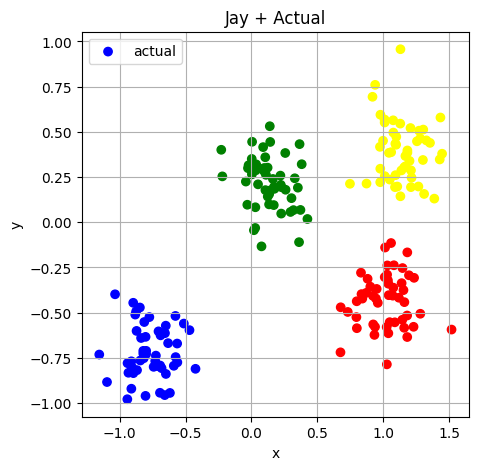

In [139]:
colors_a = []
for i in y_t:
    if i == 0:
        colors_a.append('red')
    elif i == 1:
        colors_a.append('blue')
    elif i == 2:
        colors_a.append('green')
    else:
        colors_a.append('yellow')

plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], color=colors_a, label="actual")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Jay + Actual")
plt.grid()
plt.legend()
plt.show()

